<a href="https://colab.research.google.com/github/bearbearyu1223/Python-Study-Jams/blob/main/Programming%20Machine%20Learning/Language_Model/Smart%20Compose/smart_composer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Oct  4 02:21:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    32W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from model import EncoderDecoderModel
from preprocess import generate_word_based_train_test_dataset, generate_train_dataset_for_model, generate_vocab_dict, \
    convert_sentences_to_idx, START_TOKEN, END_TOKEN, SPACE, UNK_TOKEN, generate_embedding_matrix_from_glove
from trainer import Trainer, TrainerConfig, get_predicted_txt_seq, get_txt_from_idx
from pprint import pprint
import matplotlib.pyplot as plt

In [3]:
 X_train, _, y_train, _ = generate_word_based_train_test_dataset("./data/test.csv")
word2idx, idx2word, vocab = generate_vocab_dict("./data/test.csv")
embedding_matrix = generate_embedding_matrix_from_glove(vocab=vocab, word2idx=word2idx)
input_data, teacher_data, target_data, max_len_input, max_len_output = generate_train_dataset_for_model(
    X_train=X_train, y_train=y_train,word2idx=word2idx)

100%|██████████| 170/170 [00:00<00:00, 51792.81it/s]


'Found 400000 word vectors.'
'Convert 594 words and miss 7 words'


In [4]:
config = TrainerConfig(input_vocab_size=len(word2idx), target_vocab_size=len(word2idx), embedding_dim=300,
                           embedding_matrix=embedding_matrix,
                           units=128, max_len_input=max_len_input, max_len_output=max_len_output,
                           dropout=0.2, model_name="Encoder_Decoder", batch_size=16, epochs=50)
trainer = Trainer(input_data, teacher_data, target_data, config)
trainer.train()
history = trainer.history

Model: "encoder_decoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Encoder)            multiple                  177348    
_________________________________________________________________
decoder (Decoder)            multiple                  271901    
Total params: 449,249
Trainable params: 328,793
Non-trainable params: 120,456
_________________________________________________________________
None
Epoch 1/50
68/68 [==============================] - 12s 118ms/step - loss: 1.9403 - sparse_categorical_crossentropy: 4.8674 - val_loss: 2.2565 - val_sparse_categorical_crossentropy: 5.4793
Epoch 2/50
68/68 [==============================] - 7s 108ms/step - loss: 1.2515 - sparse_categorical_crossentropy: 3.1396 - val_loss: 1.8895 - val_sparse_categorical_crossentropy: 4.5883
Epoch 3/50
68/68 [==============================] - 7s 109ms/step - loss: 0.7547 - sparse_categorical_crossentrop

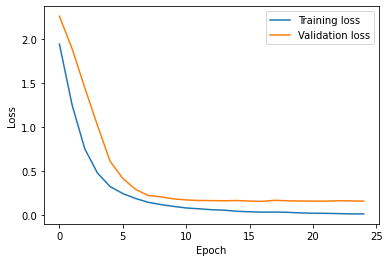

<Figure size 432x288 with 0 Axes>

In [5]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig("train_history.png")

In [11]:
test_input_txt_seq = ["i will", 
                      "if anyone have", 
                      "please mark your", 
                      "we will get back to you as",
                      "just think",
                      ]
predicted_steps = 3
for i in test_input_txt_seq:
    prediction = get_predicted_txt_seq(enc_dec_model=trainer.model, word2idx=word2idx, idx2word=idx2word,
                                        output_max_length=trainer.config.max_len_output, input_seq=i)
    pprint("input seq : {}".format(i))
    predicted_tokens = prediction.split()
    if len(predicted_tokens) <= predicted_steps:
        pprint("predict seq : {}".format(" ".join(predicted_tokens[1:])))
    else:
        pprint("predict seq : {}".format(" ".join(predicted_tokens[1:predicted_steps])))

'input seq : i will'
'predict seq : know more'
'input seq : if anyone have'
'predict seq : the opportunity'
'input seq : please mark your'
'predict seq : calendars calendars'
'input seq : we will get back to you as'
'predict seq : soon as'
'input seq : just think'
'predict seq : about it'
